In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward
import pandas as pd

In [3]:
file = uproot.open('bbcal_232.root')

In [4]:
file.classnames()

{'Run_Data': 'TNamed', 'T': 'TTree'}

In [5]:
T = file['T']
T

<TTree 'T' (39 branches) at 0x7f0a664b90b8>

In [6]:
T.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Ndata.bb.ps.a        | int32_t                  | AsDtype('>i4')
bb.ps.a              | double[]                 | AsJagged(AsDtype('>f8'))
Ndata.bb.ps.a_c      | int32_t                  | AsDtype('>i4')
bb.ps.a_c            | double[]                 | AsJagged(AsDtype('>f8'))
Ndata.bb.ps.a_p      | int32_t                  | AsDtype('>i4')
bb.ps.a_p            | double[]                 | AsJagged(AsDtype('>f8'))
Ndata.bb.ps.eblk     | int32_t                  | AsDtype('>i4')
bb.ps.eblk           | double[]                 | AsJagged(AsDtype('>f8'))
Ndata.bb.ps.nblk     | int32_t                  | AsDtype('>i4')
bb.ps.nblk           | double[]                 | AsJagged(AsDtype('>f8'))
Ndata.bb.sh.a        | int32_t                  | AsDtype('>i4')
bb.sh.a              | double[]                 | AsJagged(AsDtype('>f8')

In [7]:
# First, convert the branch of the tree that one is
# interested in into a numpy array

bb_ps_a = T["bb.ps.a"].array(library="np")

# Then, convert that numpy array into a pandas dataframe

df_bb_ps_a = pd.DataFrame(bb_ps_a,columns=["bb_ps_a"])

# Finally, for branches which are actually multidimensional arrays,
# convert each element of the array into a separate column in the
# dataframe

df_bb_ps_a = pd.DataFrame(df_bb_ps_a.bb_ps_a.tolist(), index= df_bb_ps_a.index)


In [8]:
df_bb_ps_a.info() 

# one should see that there are 54 columns, one for each block
# in the preshower (at least I am guessing that is what they are)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342395 entries, 0 to 342394
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       342395 non-null  float64
 1   1       342395 non-null  float64
 2   2       342395 non-null  float64
 3   3       342395 non-null  float64
 4   4       342395 non-null  float64
 5   5       342395 non-null  float64
 6   6       342395 non-null  float64
 7   7       342395 non-null  float64
 8   8       342395 non-null  float64
 9   9       342395 non-null  float64
 10  10      342395 non-null  float64
 11  11      342395 non-null  float64
 12  12      342395 non-null  float64
 13  13      342395 non-null  float64
 14  14      342395 non-null  float64
 15  15      342395 non-null  float64
 16  16      342395 non-null  float64
 17  17      342395 non-null  float64
 18  18      342395 non-null  float64
 19  19      342395 non-null  float64
 20  20      342395 non-null  float64
 21  21      34

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  33., 262., 486., 178.,  35.,   1.,   1.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([400., 404., 408., 412., 416., 420., 424., 428., 432., 436., 440.,
        444., 448., 452., 456., 460., 464., 468., 472., 476., 480., 484.,
        488., 492., 496., 500., 504., 508., 512., 516., 520., 524., 528.,
        532., 536., 540., 544., 548., 552., 556., 560., 564., 568., 572.,
        576., 580., 58

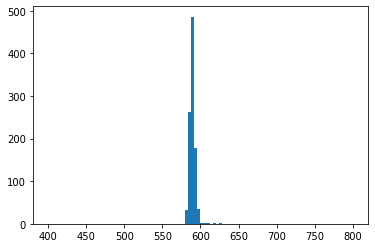

In [9]:
# plot histogram of raw adc for one of the blocks (block 0) for the
# first 1000 events.  Make the histogram 100 bins, from 400 to 800

plt.hist(df_bb_ps_a[0][0:1000],bins=100,range=(400,800))

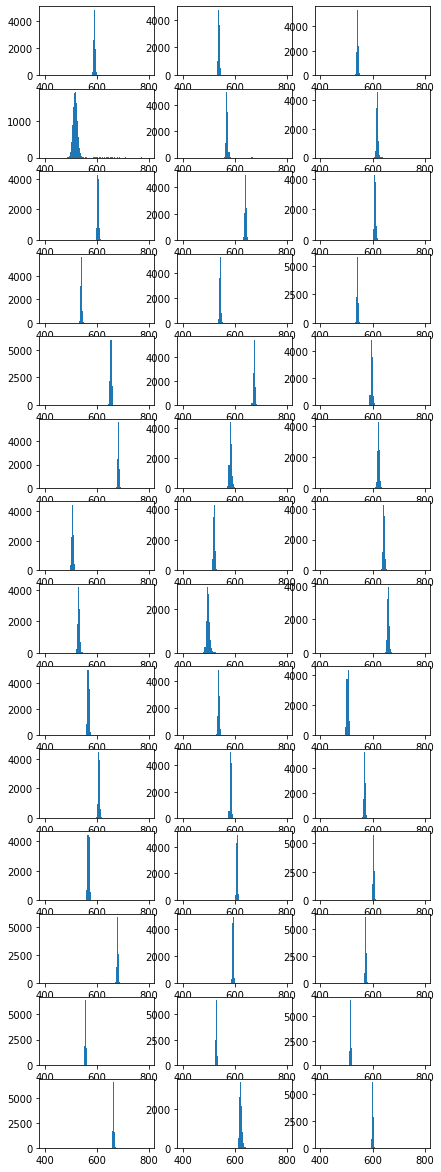

In [10]:
# plot histograms of raw adc for all of the blocks for the
# first 10000 events.  Make the histogram 100 bins, from 400 to 800

fig, axs = plt.subplots(14, 3,figsize=(7,21))
for i in range(14):
    for j in range(3):
        axs[i][j].hist(df_bb_ps_a[3*i+j][0:10000],bins=100,range=(400,800))

In [30]:
bb_ps = T.arrays(["bb.ps.asum_c","bb.ps.asum_p","bb.ps.e","bb.ps.mult","bb.ps.nclust","bb.ps.nhit","bb.ps.x","bb.ps.y"],library="pd")

(array([65., 45., 39., 27., 36., 28., 34., 33., 28., 45., 42., 47., 50.,
        46., 63., 52., 45., 28., 36., 34., 33., 31., 34., 36., 40., 43.,
        35., 37., 25., 33., 24., 27., 28., 27., 21., 18., 20., 21., 21.,
        28., 21., 16., 15., 22., 25., 18., 17., 10., 16., 16., 11., 10.,
         9.,  8.,  5.,  3., 13.,  5.,  6., 11., 17.,  7.,  9.,  9.,  7.,
         6., 11.,  5.,  9.,  5.,  5.,  3.,  4.,  5.,  6.,  4.,  2.,  2.,
         4.,  5.,  2.,  3.,  1.,  6.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,
         1.,  0.,  1.,  3.,  1.,  1.,  0.,  2.,  0.]),
 array([ 100.,  149.,  198.,  247.,  296.,  345.,  394.,  443.,  492.,
         541.,  590.,  639.,  688.,  737.,  786.,  835.,  884.,  933.,
         982., 1031., 1080., 1129., 1178., 1227., 1276., 1325., 1374.,
        1423., 1472., 1521., 1570., 1619., 1668., 1717., 1766., 1815.,
        1864., 1913., 1962., 2011., 2060., 2109., 2158., 2207., 2256.,
        2305., 2354., 2403., 2452., 2501., 2550., 2599., 2648., 2697.,
        

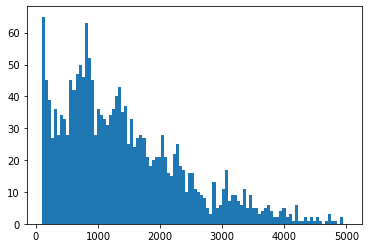

In [40]:
plt.hist(bb_ps["bb.ps.asum_c"][0:10000],bins=100,range=(100,5000))

(array([65., 45., 39., 27., 36., 28., 34., 33., 28., 45., 42., 47., 50.,
        46., 63., 52., 45., 28., 36., 34., 33., 31., 34., 36., 40., 43.,
        35., 37., 25., 33., 24., 27., 28., 27., 21., 18., 20., 21., 21.,
        28., 21., 16., 15., 22., 25., 18., 17., 10., 16., 16., 11., 10.,
         9.,  8.,  5.,  3., 13.,  5.,  6., 11., 17.,  7.,  9.,  9.,  7.,
         6., 11.,  5.,  9.,  5.,  5.,  3.,  4.,  5.,  6.,  4.,  2.,  2.,
         4.,  5.,  2.,  3.,  1.,  6.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,
         1.,  0.,  1.,  3.,  1.,  1.,  0.,  2.,  0.]),
 array([ 100.,  149.,  198.,  247.,  296.,  345.,  394.,  443.,  492.,
         541.,  590.,  639.,  688.,  737.,  786.,  835.,  884.,  933.,
         982., 1031., 1080., 1129., 1178., 1227., 1276., 1325., 1374.,
        1423., 1472., 1521., 1570., 1619., 1668., 1717., 1766., 1815.,
        1864., 1913., 1962., 2011., 2060., 2109., 2158., 2207., 2256.,
        2305., 2354., 2403., 2452., 2501., 2550., 2599., 2648., 2697.,
        

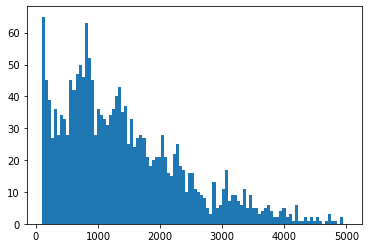

In [41]:
plt.hist(bb_ps["bb.ps.asum_c"][0:10000],bins=100,range=(100,5000))

(array([     0.,      0.,      0.,      0.,      0., 100000.,      0.,
             0.,      0.,      0.]),
 array([53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1, 54.2, 54.3, 54.4, 54.5]),
 <a list of 10 Patch objects>)

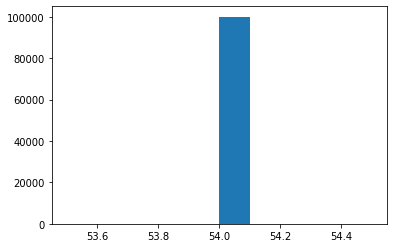

In [47]:
plt.hist(bb_ps["bb.ps.nhit"][0:100000],bins=10)

(array([     0.,      0.,      0.,      0.,      0., 100000.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

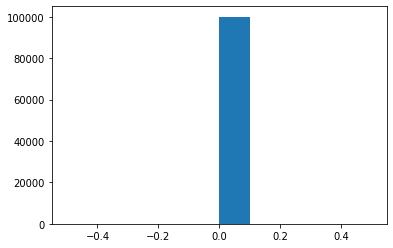

In [48]:
plt.hist(bb_ps["bb.ps.mult"][0:100000],bins=10)